# Stabilität Eulerverfahren

Bestimmte DGL lassen sich mit impliziten Verfahren besser lösen als mit expliziten Verfahren. Diese DGL bezeichnen wir als **steif**.

Das liegt vor allem an der hohen Lipschitzkonstante, die für explizite Verfahren eine sehr kleine Schrittweite bedeutet $\left(h<\frac{2}{|\lambda|}\right)$.

## Stabilität der Dahlquist- und Prothero-Robinson-Gleichungen

Ein weiteres Stabilitätsproblem ist die inhomogene Prothero-Robinson-Gleichung mit $y'=-λ(y-g)+g',λ>0,y_0=1$. $g(t)$ ist eine glatte Funktion.

Für $g(t) = 0$ entspricht die Prothero-Robinson-Gleichung der Dahlquist-Gleichung, also die DGL der Form $y'=-λy,λ>0,y_0=1$ mit der exakten Lösung $y(t)=e^{(-λt)}$

Da $e^{(-λt)}$ für $λ≫1$ schnell gegen 0 geht, sollte die Lösung schnell gegen $g(t)$ konvergieren.

Für $g(t) = const.$ lautet die DGL $y' = -\lambda (y - g)$ mit der Lösung $y(t) = g + e^{(-λt)}$, die gegen $g$ konvergiert. Diese lässt sich leicht für das implizite Eulerverfahren umformen zu $y_{k+1} = \frac{y_k + h\lambda g}{1+h\lambda}$.

## Aufgabe 1

- Weisen Sie nach, dass $y(t)=g(t)+e^{(-λt)} (y_0-g_0)$ die exakte Lösung der DGL ist.

## Aufgabe 2

Variieren Sie nun die verfügbaren Parameter sowie die zugrundeliegende Gleichung.

- Wie ändert sich die Lösung?
- Warum ist `h_selection = [0.5 * Lip, 1.01 * Lip];` abhängig von `lambda` gewählt? Was passiert, wenn `h` unabhängig von `lambda` gewählt wird? Was, wenn `h` für das explizite Verfahren nur minimal kleiner als $\frac{2}{|\lambda|}$ ist?
- Wann ist das explizite Verfahren nicht mehr hilfreich? Wie 'steif' sieht die zugehörige Funktion aus?

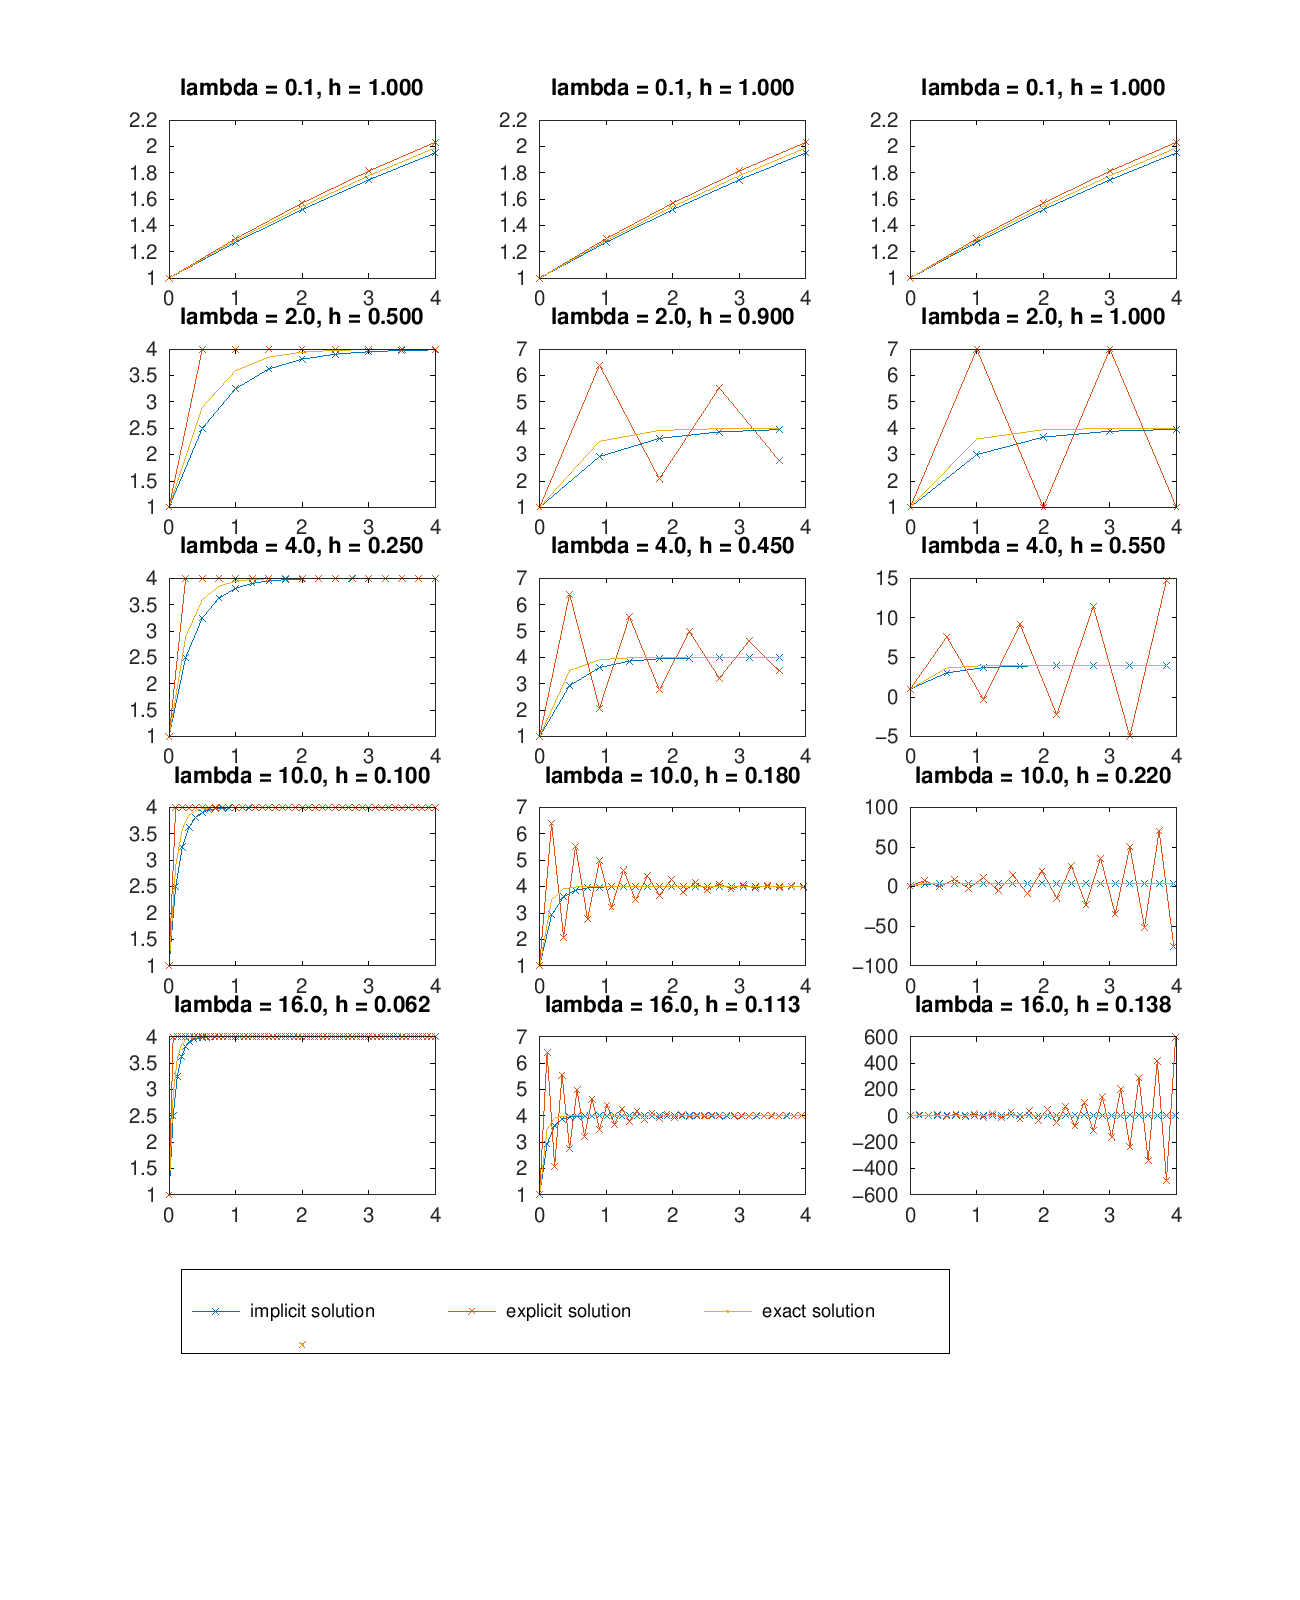

In [2]:
%graphics_toolkit (gt)

%add e-function?!
% show lambda

%close all
clearvars

%global y0 tmin tmax tspan g g0 h_i lambda tmin tmax tspan
%graphics_toolkit qt

fi.ax = axes("position",[0.05 0.42 0.5 0.5]);
% get(0,"screensize")/2);


%% Explizite Form der DGL mit g nach finiter Differenz abgeleitet
fi.fcn_g = @(t) cos(t);
fi.lambda = 2;
fi.h_i = 0.5;
fi.fcn_proth = @(t,y) - fi.lambda* (y - fi.fcn_g(t)) + (fi.fcn_g(t+fi.h_i)-fi.fcn_g(t-fi.h_i))/(2*fi.h_i);


function updatefig(obj, init = false)
  %global y0 tmin tmax tspan g g0 h_i lambda fi
  
  fi = guidata(obj);
  replot = false;
  recalc = false;
  switch (gcbo)
    case {fi.update_button}
      recalc = true;
      replot = true;
    case {fi.quit_button}  
      close all;  
    case {fi.h_e_slide,fi.h_i_slide,fi.y0_slide,fi.update_button,fi.lambda_slide}
      recalc = true;
    case {fi.g_field}
      recalc = true;
  endswitch
  
  if (recalc || init)
    %% Input-Params
    h_e = get(fi.h_e_slide, 'value');
    fi.h_i = get(fi.h_i_slide, 'value');
    y0 = get(fi.y0_slide, 'value');
    fi.lambda = get(fi.lambda_slide, 'value');
    
    fi.fcn_g = str2func(get(fi.g_field,'string'));
    fi.fcn_proth = @(t,y) - fi.lambda* (y - fi.fcn_g(t)) + (fi.fcn_g(t+fi.h_i)-fi.fcn_g(t-fi.h_i))/(2*fi.h_i);
    
    %% Timescale
    tmin = 0;
    tmax = 10;
    tspan = tmin:0.1:tmax;
    
    %% Annäherungsfunktion
    g0 = fi.fcn_g(0);
    
    %% Schrittweite fuer explizite Loesung
    %h_lim = 2/abs(lambda);
    %h_e = 0.5 * h_lim;

    %% Loesung mit explizitem Eulerverfahren
    t_e = tmin:h_e:tmax;
    fi.y_e = zeros(size(t_e));
    y_e(1) = y0;
    for i = 2:length(t_e)
        y_e(i) = y_e(i-1) + h_e * fi.fcn_proth(t_e(i-1),y_e(i-1));
    end

    %% Loesung mit implizitem Eulerverfahren
    t_i = tmin:fi.h_i:tmax;
    y_i=zeros(size(t_i));
    y_i(1)=y0;
    for i = 2:length(t_i)
        y_i(i) = ( y_i(i-1) + fi.h_i*fi.lambda*fi.fcn_g(t_i(i))) / (1+fi.h_i*fi.lambda);
    end

    %% Graphische Ausgabe
    replot = true;
  endif
  
  if (replot)
    fi.plot = plot(t_i,y_i,t_e,y_e,tspan, fi.fcn_g(tspan) + exp(-fi.lambda*tspan)*(y0-g0), tspan, exp(-fi.lambda*tspan)*(y0-g0));
    
    fi.plotlabel = legend('implicit solution', 'explicit solution', 'exact solution', 'e-function contribution');
    
    %set(get(fi.ax,'title'),'string', sprintf('lambda = %.1f, h_e = %.3f', lambda, h_e));
    fi.h_e_label = uicontrol ("style", "text",...
                          "string", sprintf("h for explicit solver = %.3f, %d steps", h_e, tmax/h_e),...
                          "horizontalalignment", "left",...
                          "position", [600,10,400,30]);
                          
    
    fi.h_i_label = uicontrol ("style", "text",...
                          "string", sprintf("h for implicit solver = %.3f, %d steps", fi.h_i, tmax/fi.h_i),...
                          "horizontalalignment", "left",...
                          "position", [600,40,400,30]);
                          
    fi.y0_label = uicontrol ("style", "text",...
                          "string", sprintf("y0 for both solvers = %.2f", y0),...
                          "horizontalalignment", "left",...
                          "position", [600,70,300,30]);
                          
    fi.lambda_label = uicontrol ("style", "text",...
                          "string", sprintf("lambda = %.2f", fi.lambda),...
                          "horizontalalignment", "left",...
                          "position", [600,100,300,30]);
                          
    fi.lambda_check_label = uicontrol ('style', 'text',...
                          'string', sprintf('h_e = %.1f * h_lim (h_lim = 2/abs(lambda))', h_e / (2/abs(fi.lambda))),...
                          'horizontalalignment','left',...
                          'position', [900, 100, 500, 30]);
    
    if h_e / (2/abs(fi.lambda)) >= 1
      %set (get(fi.lambda_check_label,'string'), 'color', 'red');
      set (fi.lambda_check_label, 'foregroundcolor', 'red');
      set (fi.lambda_check_label, 'string', sprintf('h_e = %.1f * h_lim (h_lim = 2/abs(lambda)), divergence!', h_e / (2/abs(fi.lambda))));
    endif

  endif
endfunction

fi.update_button = uicontrol('style','pushbutton',...
                      'string','Update',...
                      'callback',@updatefig,...
                      'position',[10,10,100,30]);

fi.quit_button = uicontrol('style','pushbutton',...
                      'string','Quit',...
                      'callback',@updatefig,...
                      'position',[1000,10,100,30]);

fi.h_e_slide = uicontrol('style','slider',...
                      'min',0.01,...
                      'max',2,...
                      'value',0.5,...
                      'callback',@updatefig,...
                      'position',[150,10,400,30]);

fi.h_i_slide = uicontrol('style','slider',...
                      'min',0.01,...
                      'max',2,...
                      'value',0.5,...
                      'callback',@updatefig,...
                      'position',[150,40,400,30]);

fi.y0_slide = uicontrol('style','slider',...
                      'min',0.1,...
                      'max',10,...
                      'value',0.1,...
                      'callback',@updatefig,...
                      'position',[150,70,400,30]);

fi.lambda_slide = uicontrol('style','slider',...
                      'min',0.01,...
                      'max',10,...
                      'value',2,...
                      'callback',@updatefig,...
                      'position',[150,100,400,30]);

fi.g_field = uicontrol('style','edit',...
                      'string','@(t) cos(t)',
                      'callback',@updatefig,
                      'position',[1000,70,400,30]);
                      
set (gcf, "color", get(0, "defaultuicontrolbackgroundcolor"))
guidata(gcf,fi);
updatefig(gcf,true);

- Variieren Sie nun `g`. Können Sie $g(t) = 4 t^2$ implementieren und die DGL lösen?

```{admonition} Zusatzinformationen
:class: tip
Die MATLAB Dokumentation und zugehörige Blogs liefern weitere anschauliche Beispiele:

- [https://de.mathworks.com/help/matlab/math/choose-an-ode-solver.html](https://de.mathworks.com/help/matlab/math/choose-an-ode-solver.html)
- [https://de.mathworks.com/help/matlab/math/solve-stiff-odes.html](https://de.mathworks.com/help/matlab/math/solve-stiff-odes.html)
- [https://blogs.mathworks.com/cleve/2014/06/09/ordinary-differential-equations-stiffness/](https://blogs.mathworks.com/cleve/2014/06/09/ordinary-differential-equations-stiffness/)
```